<a href="https://colab.research.google.com/github/sbj6364/coffeeshop-commercial-analysis/blob/main/8_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 8번 : 종합하여 시각화하기

이제까지 주요 5대 브랜드 커피전문점에 대한 비율을 확인해보았습니다.

지금까지 보았던 비율들을 조금 더 시각적으로 잘 이해할 수 있도록 시각화를 해볼까요?

지금까지 알아본 각 브랜드별 입점 비율에 대해 barplot 을 그리는 코드를 작성하세요.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!unzip '/content/drive/MyDrive/coffeeshop-analysis/소상공인시장진흥공단_상가(상권)정보_20201231.zip'

In [27]:
d1 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_강원_202012.csv', sep='|')
d2 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_경기_202012.csv', sep='|')
d3 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_경남_202012.csv', sep='|')
d4 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_경북_202012.csv', sep='|')
d5 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_광주_202012.csv', sep='|')
d6 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_대구_202012.csv', sep='|')
d7 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_대전_202012.csv', sep='|')
d8 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_부산_202012.csv', sep='|')
d9 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_서울_202012.csv', sep='|')
d10 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_세종_202012.csv', sep='|')
d11 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_울산_202012.csv', sep='|')
d12 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_인천_202012.csv', sep='|')
d13 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_전남_202012.csv', sep='|')
d14 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_전북_202012.csv', sep='|')
d15 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_제주_202012.csv', sep='|')
d16 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_충남_202012.csv', sep='|')
d17 = pd.read_csv('/content/소상공인시장진흥공단_상가(상권)정보_충북_202012.csv', sep='|')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df = pd.DataFrame(d1)
df = df.append(pd.DataFrame(d2))
df = df.append(pd.DataFrame(d3))
df = df.append(pd.DataFrame(d4))
df = df.append(pd.DataFrame(d5))
df = df.append(pd.DataFrame(d6))
df = df.append(pd.DataFrame(d7))
df = df.append(pd.DataFrame(d8))
df = df.append(pd.DataFrame(d9))
df = df.append(pd.DataFrame(d10))
df = df.append(pd.DataFrame(d11))
df = df.append(pd.DataFrame(d12))
df = df.append(pd.DataFrame(d13))
df = df.append(pd.DataFrame(d14))
df = df.append(pd.DataFrame(d15))
df = df.append(pd.DataFrame(d16))
df = df.append(pd.DataFrame(d17))

In [ ]:
is_cafe = df['상권업종중분류명'] == '커피점/카페'
df_cafes = df[is_cafe]
df_cafes = df_cafes[['상호명','지점명',
       '상권업종대분류명', '상권업종중분류명',
       '시도명', '시군구명', '행정동명',
       '위도', '경도']]
       
df_cafes = df_cafes.reset_index(drop=True)
df_cafes.head()

In [ ]:
is_in_seoul = df_cafes['시도명'] == '서울특별시'
df_cafes_seoul = df_cafes[is_in_seoul]
# df_cafes_seoul = df_cafes_seoul.drop(['위도', '경도'], axis = 1)

df_cafes_seoul = df_cafes_seoul.reset_index(drop=True)
df_cafes_seoul.head()

In [62]:
is_starbucks = df_cafes['상호명'].str.contains('스타벅스')
is_starbucks_seoul = df_cafes_seoul['상호명'].str.contains('스타벅스')

is_twosome = df_cafes['상호명'].str.contains('투썸')
is_twosome_seoul = df_cafes_seoul['상호명'].str.contains('투썸')

is_ediya = df_cafes['상호명'].str.contains('이디야')
is_ediya_seoul = df_cafes_seoul['상호명'].str.contains('이디야')

is_bbaek = df_cafes['상호명'].str.contains('빽다방')
is_bbaek_seoul = df_cafes_seoul['상호명'].str.contains('빽다방')

is_coffeebean = df_cafes['상호명'].str.contains('커피빈')
is_coffeebean_seoul = df_cafes_seoul['상호명'].str.contains('커피빈')

In [63]:
def reset_index(df):
  df = df.reset_index(drop=True)
  return df

In [64]:
# 스타벅스
df_starbucks = reset_index(df_cafes[is_starbucks])
df_starbucks_seoul = df_cafes_seoul[is_starbucks_seoul]

# 투썸플레이스
df_twosome = reset_index(df_cafes[is_twosome])
df_twosome_seoul = df_cafes_seoul[is_twosome_seoul]

# 이디야
df_ediya = reset_index(df_cafes[is_ediya])
df_ediya_seoul = df_cafes_seoul[is_ediya_seoul]

# 빽다방
df_bbaek = reset_index(df_cafes[is_bbaek])
df_bbaek_seoul = df_cafes_seoul[is_bbaek_seoul]

# 커피빈
df_coffeebean = reset_index(df_cafes[is_coffeebean])
df_coffeebean_seoul = df_cafes_seoul[is_coffeebean_seoul]

In [79]:
total = len(df_cafes)

s = len(df_starbucks)
t = len(df_twosome)
e = len(df_ediya)
b = len(df_bbaek)
c = len(df_coffeebean)

s_p = s*100 / total
t_p = t*100 / total
e_p = e*100 / total
b_p = b*100 / total
c_p = c*100 / total

p = s_p + t_p + e_p + b_p + c_p

In [81]:
print('***** 전국 카페 중 5대 브랜드 비율 *****\n')
print('1. 스타벅스 :', round(s_p,3) ,'%')
print('2. 투썸플레이스 :', round(t_p,3) ,'%')
print('3. 이디야 :', round(e_p,3) ,'%')
print('4. 빽다방 :', round(b_p,3) ,'%')
print('5. 커피빈 :', round(c_p,3) ,'%')
print('6. 5대 브랜드의 합 :', round(p,3) ,'%')

***** 전국 카페 중 5대 브랜드 비율 *****

1. 스타벅스 : 1.419 %
2. 투썸플레이스 : 1.003 %
3. 이디야 : 1.968 %
4. 빽다방 : 0.499 %
5. 커피빈 : 0.285 %
6. 5대 브랜드의 합 : 5.174 %


In [87]:
total_seoul = len(df_cafes_seoul)

s = len(df_starbucks)
t = len(df_twosome)
e = len(df_ediya)
b = len(df_bbaek)
c = len(df_coffeebean)

s_p_s = s*100 / total_seoul
t_p_s = t*100 / total_seoul
e_p_s = e*100 / total_seoul
b_p_s = b*100 / total_seoul
c_p_s = c*100 / total_seoul

p_s = s_p_s + t_p_s + e_p_s + b_p_s + c_p_s

In [84]:
print('***** 서울 카페 중 5대 브랜드 비율 *****\n')
print('1. 스타벅스 :', round(s_p_s,3) ,'%')
print('2. 투썸플레이스 :', round(t_p_s,3) ,'%')
print('3. 이디야 :', round(e_p_s,3) ,'%')
print('4. 빽다방 :', round(b_p_s,3) ,'%')
print('5. 커피빈 :', round(c_p_s,3) ,'%')
print('6. 5대 브랜드의 합 :', round(p_s,3) ,'%')

***** 서울 카페 중 5대 브랜드 비율 *****

1. 스타벅스 : 7.253 %
2. 투썸플레이스 : 5.131 %
3. 이디야 : 10.063 %
4. 빽다방 : 2.55 %
5. 커피빈 : 1.457 %
6. 5대 브랜드의 합 : 26.454 %


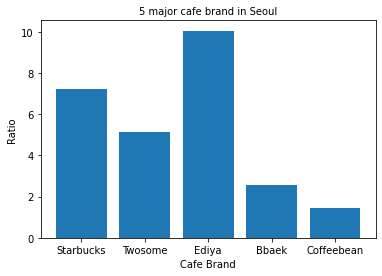

In [108]:
prob = [s_p_s, t_p_s, e_p_s, b_p_s, c_p_s]
cafes = ['Starbucks', 'Twosome', 'Ediya', 'Bbaek', 'Coffeebean']

plt.bar(cafes, prob)
plt.title('5 major cafe brand in Seoul', fontsize=10)
plt.xlabel('Cafe Brand', fontsize=10)
plt.ylabel('Ratio', fontsize=10)

plt.show()